### Importing Libraries

In [1]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, roc_auc_score

### Helper Function

In [2]:
def getDataPath():
    return os.path.join(os.getcwd(), 'datasets')

def showDir(path_):
    print(os.listdir(path_))

def splitFeat(df):
    """splitting between categorical & continous variable

    Args:
        df (pandas DataFrame): Get the training data

    Returns:
        categ: list of categorical column name
        conti: list of continous column name
    """
    categ = []
    conti = []

    for col in df:
        if df[col].nunique() > 100:
            conti.append(col)

        else:
            categ.append(col)

    return categ, conti

def countplot_(col_list, df):
    """create a categorical countplot

    Args:
        col_list (list): categorical column list
        df (pandas DataFrame): training datasets
    """

    # to check if the data is in dataframe or series
    isDataFrame = isinstance(df, pd.DataFrame)

    # output the countplot
    if isDataFrame:
        for col in col_list:
            sns.countplot(x=df[col])
            plt.title(col)
            plt.show()

    else:
        sns.countplot(x=df)
        plt.title(df.name)
        plt.show()

def boxplot_(col_list, df):
    """create a continous countplot

    Args:
        col_list (list): continous column list
        df (pandas DataFrame): training datasets
    """
    # to check if the data is in dataframe or series
    isDataFrame = isinstance(df, pd.DataFrame)

    if isDataFrame:
        for col in col_list:
            sns.boxplot(y=df[col], orient='v')
            plt.title(col)
            plt.show()

    else:
        sns.boxplot(y=df, orient='v')
        plt.title(df.name)
        plt.show()

def displot_(col_list, df):
    """create a continous countplot

    Args:
        col_list (list): continous column list
        df (pandas DataFrame): training datasets
    """

    # to check if the data is in dataframe or series
    isDataFrame = isinstance(df, pd.DataFrame)

    if isDataFrame:
        for col in col_list:
            sns.displot(x=df[col])
            plt.title(col)
            plt.show()

    else:
        sns.displot(x=df)
        plt.title(df.name)
        plt.show()

def boxHistplot_(col_list, df):
    """create a categorical boxplot & histogram plot

    Args:
        col_list (list): categorical column list
        df (pandas DataFrame): training datasets

    Credit:
        https://python-graph-gallery.com/24-histogram-with-a-boxplot-on-top-seaborn/
    """

    # to check if the data is in dataframe or series
    isDataFrame = isinstance(df, pd.DataFrame)

    if isDataFrame:
        for col in col_list:
            # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
            f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
            
            # assigning a graph to each ax
            sns.boxplot(x=df[col], orient="h", ax=ax_box)
            sns.histplot(data=df, x=col, ax=ax_hist)
            
            # Remove x axis name for the boxplot
            ax_box.set(xlabel='')
            ax_box.set(title=col)
            plt.show()

    else:
        # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
        f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
        
        # assigning a graph to each ax
        sns.boxplot(x=df, orient="h", ax=ax_box)
        sns.histplot(x=df, ax=ax_hist)
        
        # Remove x axis name for the boxplot
        ax_box.set(xlabel='')
        ax_box.set(title=df.name)
        plt.show()

def FS_LR(col_list, y_train, X_train, threshold):
    """Get the correlation score between continous and categorical variable

    Args:
        col_list (list): input variable list
        y_train (pandas Series): target data
        X_train (pandas DataFrame): input data
        threshold (INT): Threshold value to filter selection of features

    Returns:
        list: a list of input variable name
    """

    feature_score = []

    for col in col_list:
        lr = LogisticRegression()
        lr.fit(np.expand_dims(X_train[col], axis=-1), y_train)
        score = lr.score(np.expand_dims(X_train[col], axis=-1), y_train)
        print(f"The score between {col} with {y_train.name} is {round(score, 5)}")
        if score > threshold:
            feature_score.append(col)
    return feature_score

def UnderSampling(X_df:pd.DataFrame, y_df:pd.Series, frac:int, random_state:int):
    """Under sampling imbalanced data using dataframe function

    Args:
        X_df (pd.DataFrame): label datasets
        y_df (pd.Series): target datasets
        frac (int): internal variable for shuffling
        random_state (int): RNG variable

    Returns:
        pd.DataFrame: Under sampling in dataframe format
    """

    min_value = float(np.inf)

    df = X_df.merge(y_train.to_frame(), left_index=True, right_index=True)
    df = df.sample(frac=frac, random_state=random_state)


    for unique in y.unique():
        num_unique = df.loc[df[y_df.name] == unique].shape[0]
        
        if num_unique <= min_value:
            min_value = num_unique

            sampling = pd.DataFrame()
            for i in y.unique():
                sampling = pd.concat([sampling, df.loc[df[y_df.name] == i][:min_value]])

    return sampling.sample(frac=frac, random_state=random_state).reset_index(drop=True)

# To make model creation more scalable, lets create a function for that
def modelBuild(scaler_dict:dict, sklearn_model:dict) -> dict:
    # create a combination between scaler and machine learning
    for scaler in scaler_dict:
        for model in sklearn_model:
            # take only capital letter
            name_scaler = re.sub('[^A-Z]', '', scaler)
            name_ml = re.sub('[^A-Z]', '', model)
            
            # create a pipeline dictionary
            pipelines_dict[name_scaler+'_'+name_ml] = Pipeline([(scaler, scaler_dict[scaler]),
                                                                (model, ml_dict[model])
                                                                ])
            return pipelines_dict
        
# roc_curve display
def roc_curve_plot(fpr, tpr, model):
    plt.figure(figsize=(6,5))
    plt.title(f'{model} ROC Curve', fontsize=16)
    plt.plot(fpr, tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    plt.show()

        
# After reading back the data as well as researching on imbalanced data, lets do a new model metrics
def modelFitBinary(pipelines:dict, X_train, y_train, pos_label, test_case):
    
    models_score = {}
    best_score = 0
    best_model = []
    
    
    for pipe in pipelines:
        pipelines[pipe].fit(X_train, y_train)
        model_pred = pipelines[pipe].predict(X_train)
        model_pred_prob = pipelines[pipe].predict_proba(X_train)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_train, model_pred, pos_label=pos_label)
        roc_curve_plot(fpr, tpr, pipe)
        
        if test_case.lower() == 'auc':
            # Compute Area Under the Curve (AUC) using the trapezoidal rule.
            models_score[pipe] = auc(fpr, tpr)
            print(f'The AUC score for {pipe} : {models_score[pipe]}')
            
        if test_case.lower() == 'roc_auc':
            # Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
            models_score[pipe] = roc_auc_score(y_train, model_pred_prob)
            print(f'The ROC_AUC score for {pipe} : {models_score[pipe]}')
                
        if models_score[pipe] > best_score:
                best_score = models_score[pipe]
                best_model = pipelines_dict[pipe]
                
    return best_model

# model_evaluation
def modelEvaBinary(best_model, X_test, y_test):
    y_pred = best_model.predict(X_test)
    print("Classification Report \n\n", classification_report(y_test, y_pred))
    
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix")
    plt.show()

### Data Loading

In [3]:
# get the standard data path
datasets_path = getDataPath()

# display all file in the datasets file
showDir(datasets_path)

['creditcard.csv']


In [4]:
df = pd.read_csv(os.path.join(datasets_path, 'creditcard.csv'))
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# output the list of columns
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### Splitting data into train and test

In [6]:
# Original data structure
df.shape

(284807, 31)

In [7]:
# based on the metadata, y will be the 'Class' column
y = df['Class']
X = df.drop(columns=['Class'])

In [8]:
# reconfirm the X has no 'Class' column
X.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [9]:
# reconfirm the y is the 'Class'
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

Splitting the data into 70% test, 30% train

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   stratify=y,
                                                   test_size=0.7)

In [11]:
X_train.shape

(85442, 30)

In [12]:
X_test.shape

(199365, 30)

### Data Visualization & Data Cleaning

In [13]:
# display datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [14]:
# check basic statistic
X_train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000,...,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000
mean,94754.994160,0.000189,-0.007776,0.004872,-0.002783,-0.008512,0.003057,0.001284,0.004313,0.002743,...,-0.001819,0.002493,0.000832,0.000192,-0.000542,0.000263,0.001044,0.001190,0.000008,89.488602
std,47438.506409,1.949161,1.656219,1.516388,1.417067,1.422875,1.347146,1.286562,1.166243,1.092727,...,0.798157,0.727431,0.723911,0.615461,0.604790,0.520568,0.483746,0.409968,0.328646,273.130116
min,0.000000,-40.470142,-63.344698,-48.325589,-5.683171,-113.743307,-21.929312,-33.239328,-50.688419,-10.842526,...,-54.497720,-22.757540,-10.933144,-30.269720,-2.836627,-7.025783,-2.534330,-9.845808,-15.430084,0.000000
25%,54318.000000,-0.924330,-0.605438,-0.879279,-0.848856,-0.700049,-0.764692,-0.558175,-0.208110,-0.640208,...,-0.213079,-0.226929,-0.541355,-0.164171,-0.354042,-0.317284,-0.326258,-0.070350,-0.052464,5.760000
50%,84564.500000,0.020843,0.056794,0.183894,-0.024744,-0.061790,-0.270140,0.036871,0.023773,-0.047485,...,-0.061862,-0.028214,0.009721,-0.012359,0.040633,0.017551,-0.053543,0.001822,0.011465,22.500000
75%,139355.750000,1.313208,0.802432,1.029038,0.743840,0.609237,0.408980,0.569456,0.327164,0.601497,...,0.133700,0.186170,0.527771,0.147313,0.439706,0.353004,0.242465,0.090924,0.077604,77.510000
max,172792.000000,2.446505,17.930550,4.029428,16.715537,32.911462,73.301626,120.589494,18.748872,9.099082,...,39.420904,27.202839,7.357255,19.228169,4.584549,5.852484,3.415636,31.612198,16.129609,25691.160000


In [15]:
# check for missing data
X_train.columns[X_train.isnull().any()]

Index([], dtype='object')

In [16]:
for col in X_train:
    if X_train[col].dtype == 'float':
        num_unique = X_train[col].nunique()

        print(f"{col} has {num_unique}")

Time has 63712
V1 has 84071
V2 has 84071
V3 has 84071
V4 has 84071
V5 has 84071
V6 has 84071
V7 has 84071
V8 has 84071
V9 has 84071
V10 has 84071
V11 has 84071
V12 has 84071
V13 has 84071
V14 has 84071
V15 has 84071
V16 has 84071
V17 has 84071
V18 has 84071
V19 has 84071
V20 has 84071
V21 has 84071
V22 has 84071
V23 has 84071
V24 has 84071
V25 has 84071
V26 has 84071
V27 has 84071
V28 has 84071
Amount has 17336


In [17]:
# often, categorical data has less unique
categ, conti = splitFeat(X_train)

### Findings:
1. Also all input or labels will be in continous variable

In [18]:
categ

[]

In [19]:
conti

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

### Findings:
1. Imbalanced data

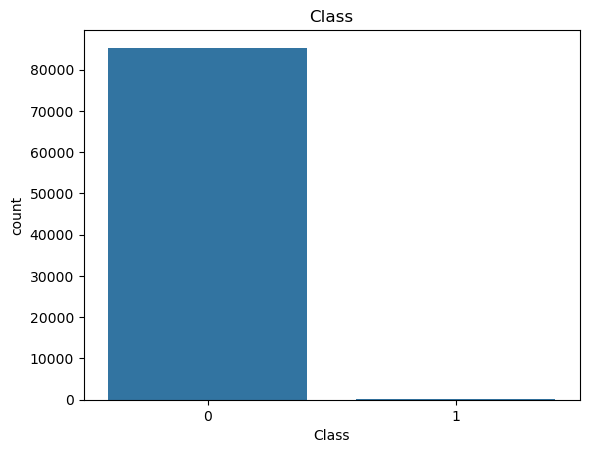

In [20]:
countplot_(['Class'], y_train)

### Findings:
1. Except for 'Time' column, all continous variable seems to have outliers

In [21]:
# boxplot_(conti, X_train)

In [22]:
# displot_(conti, X_train)

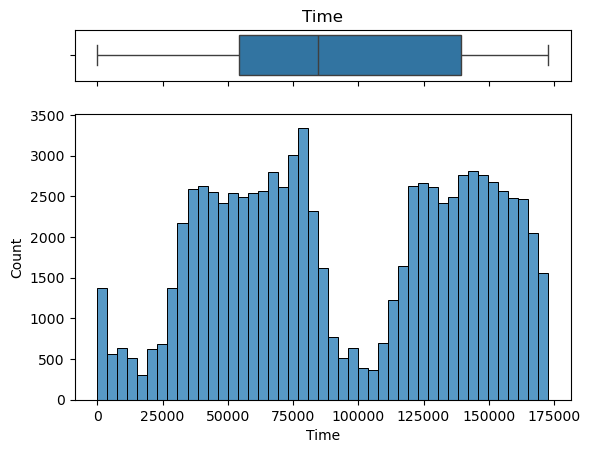

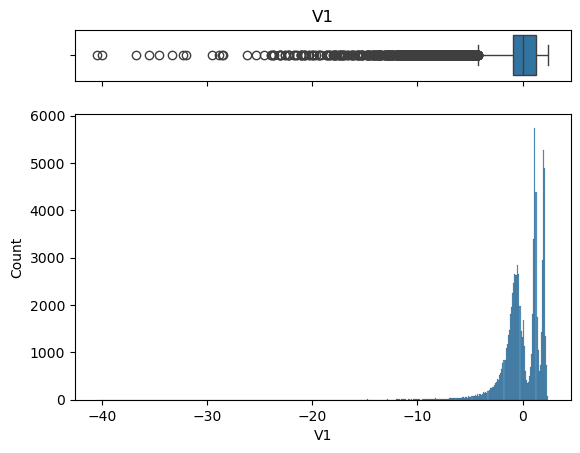

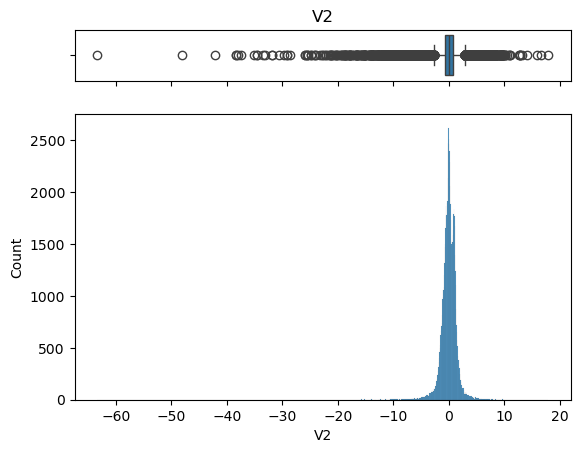

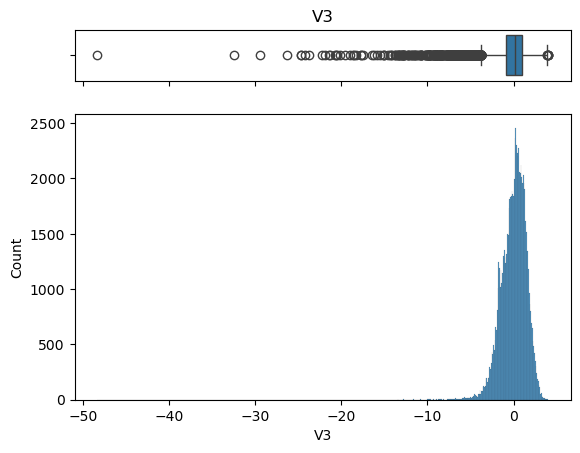

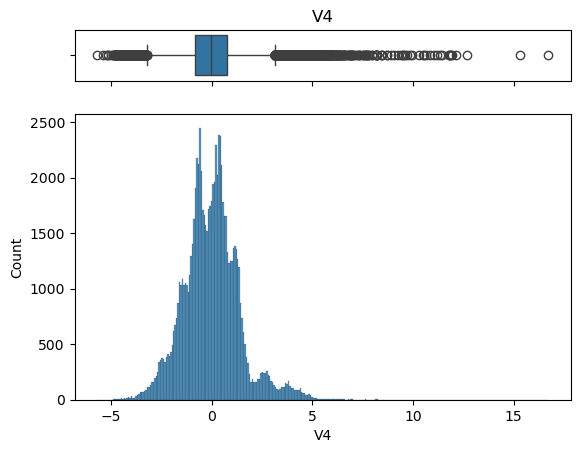

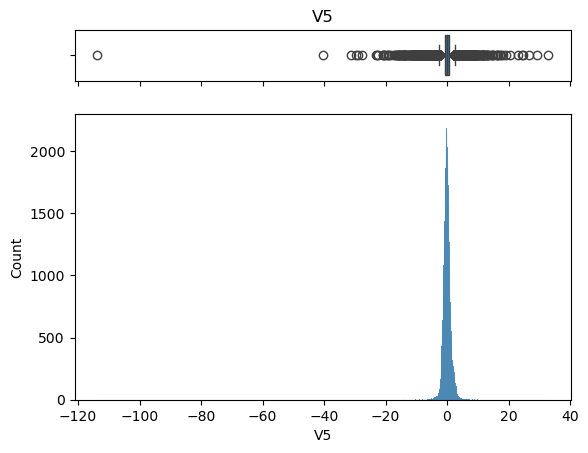

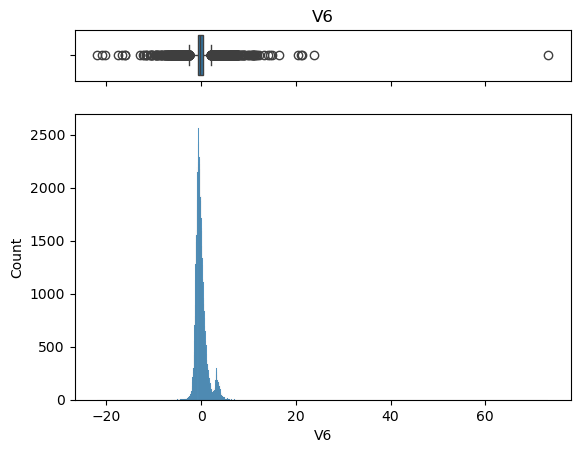

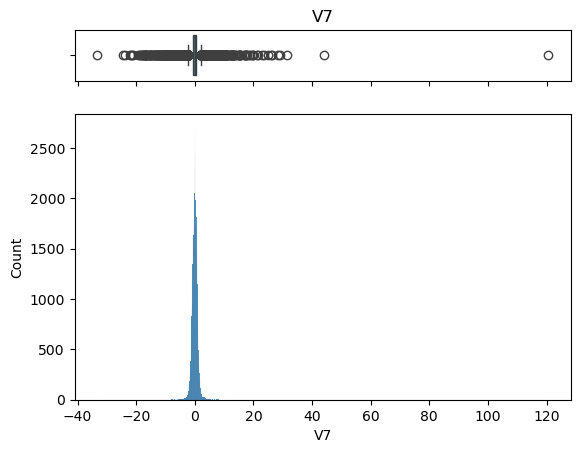

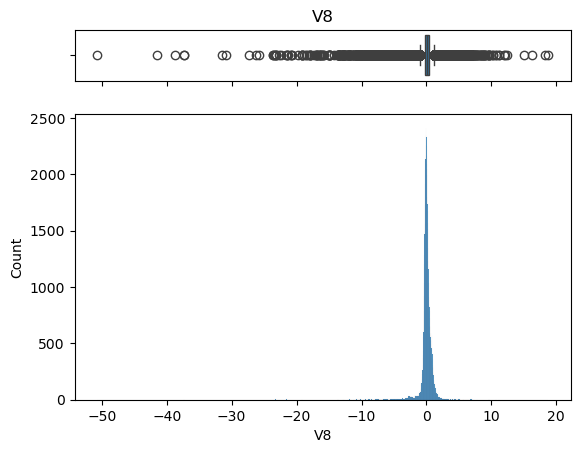

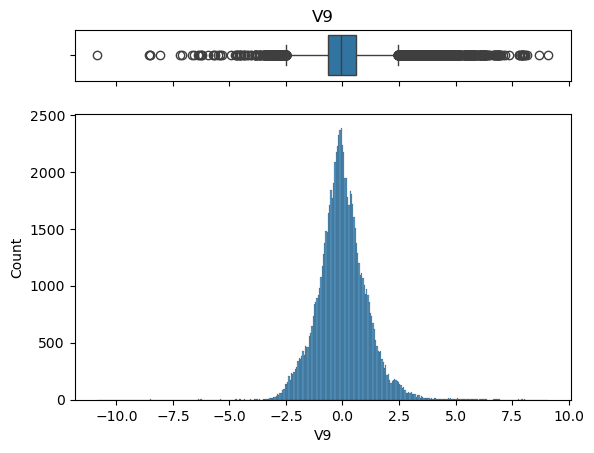

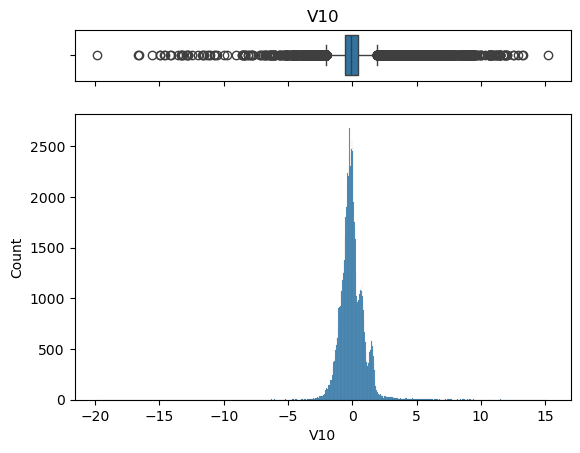

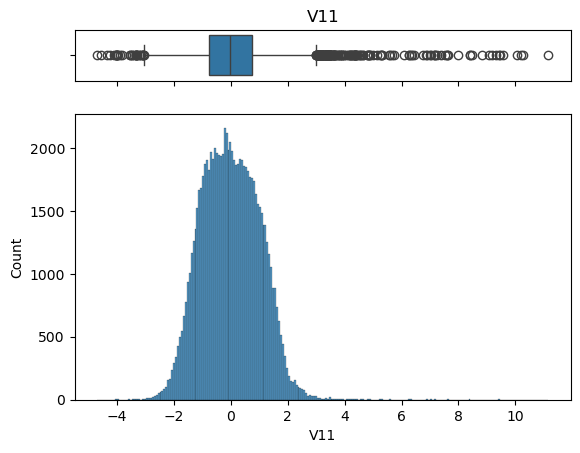

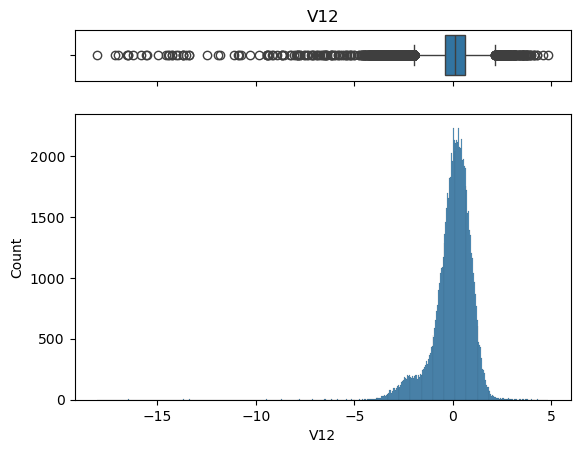

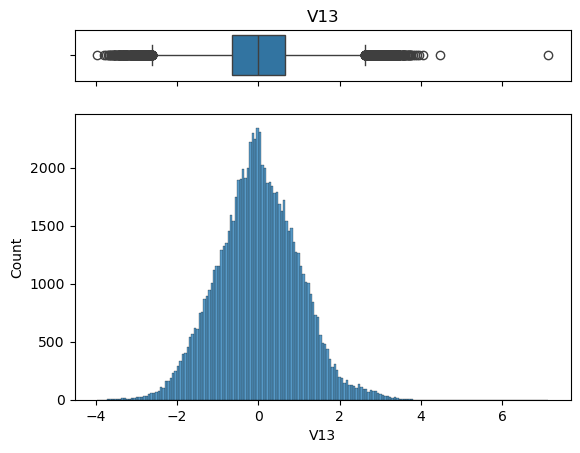

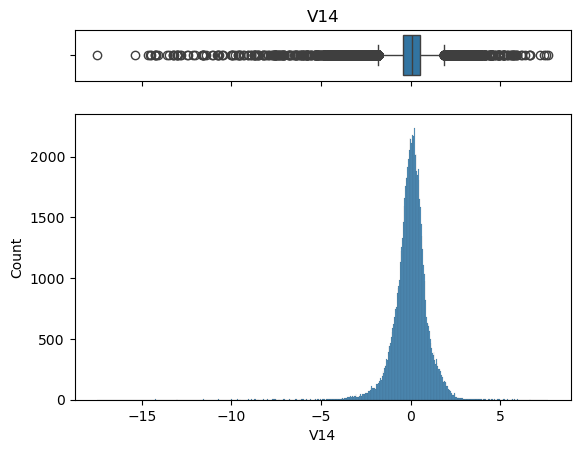

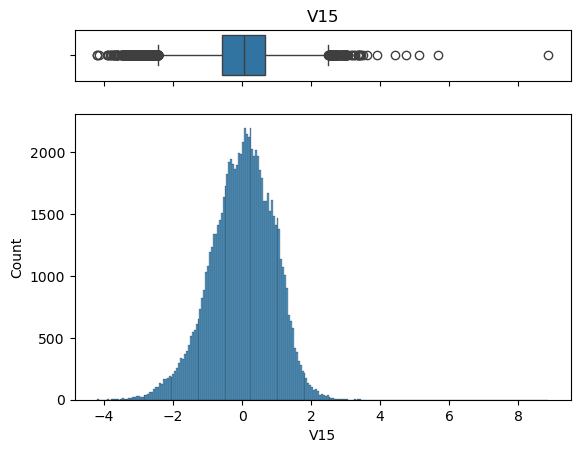

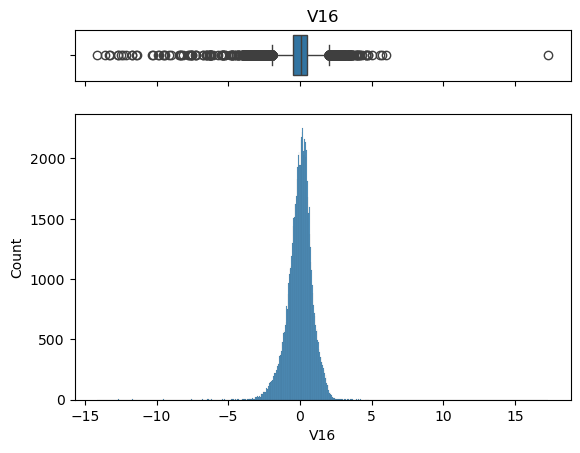

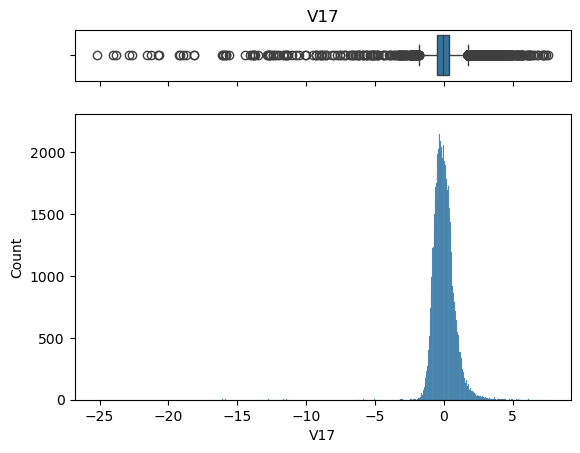

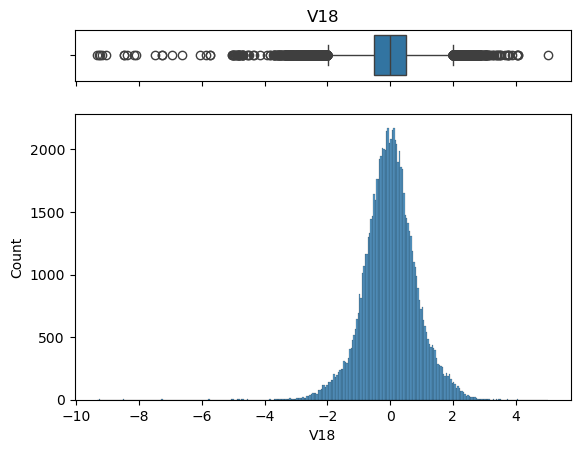

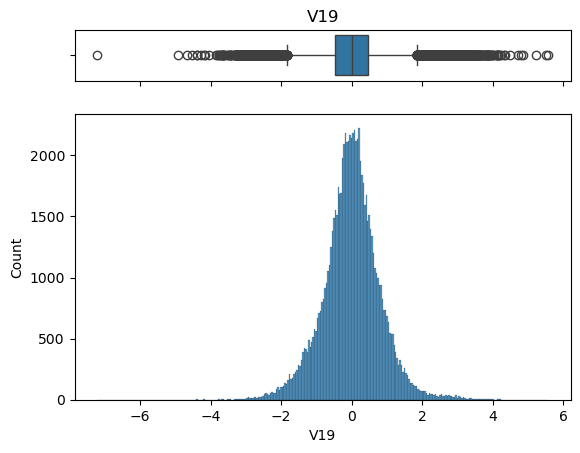

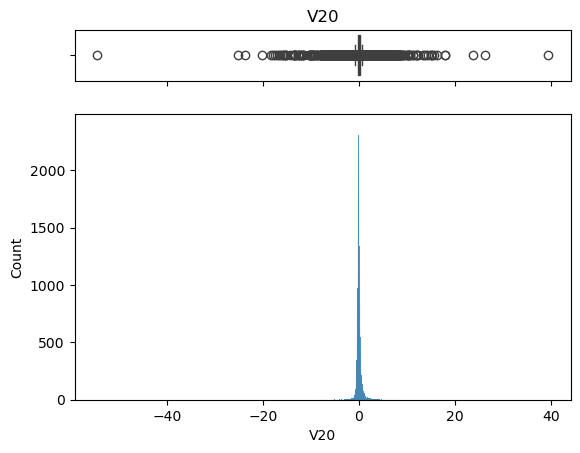

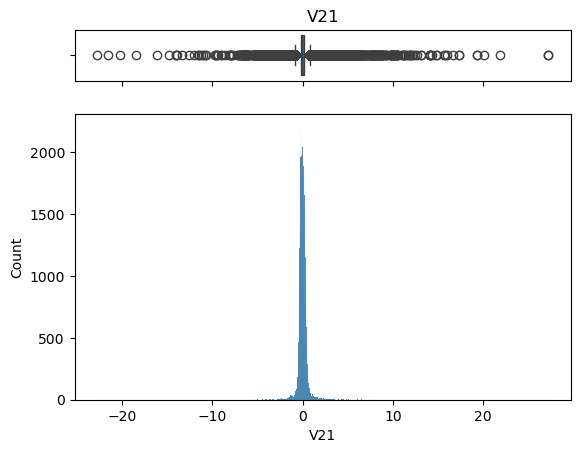

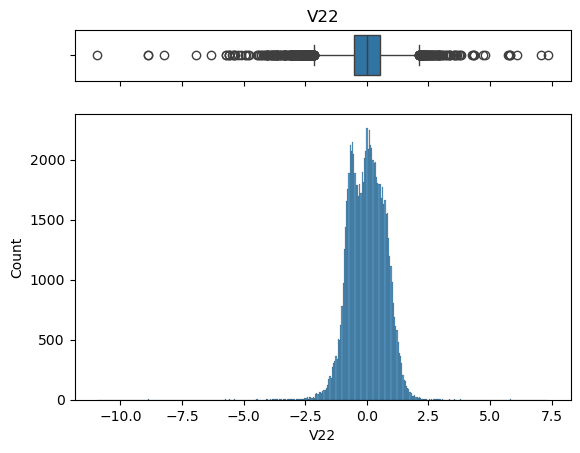

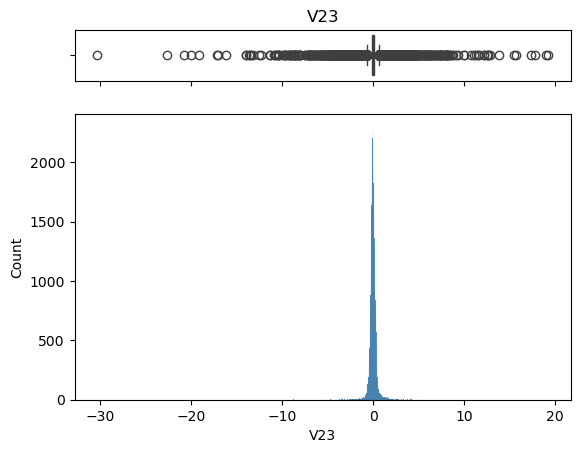

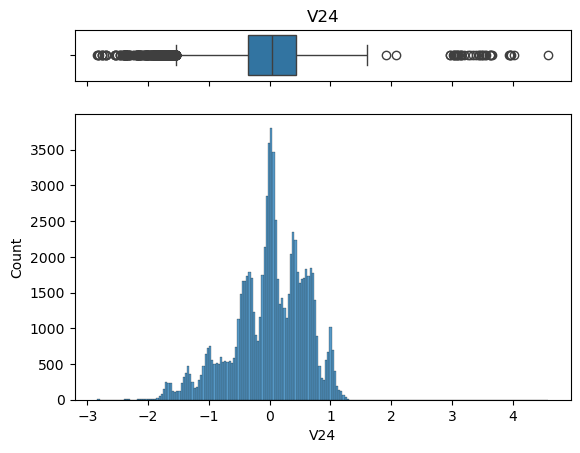

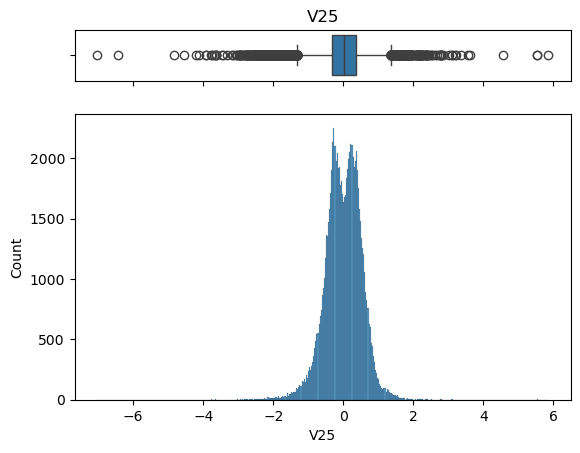

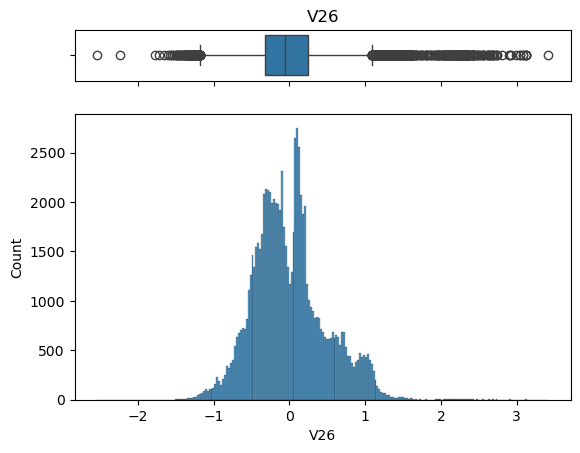

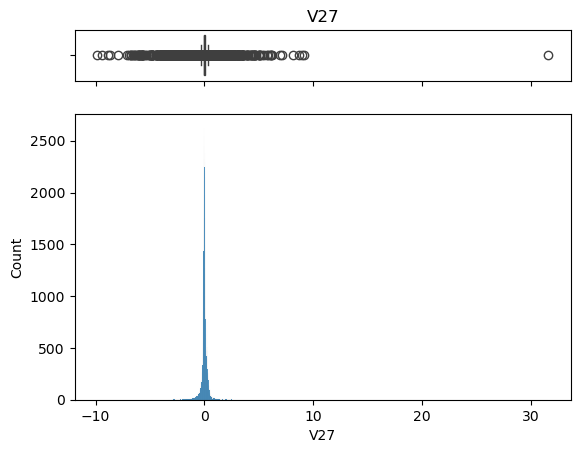

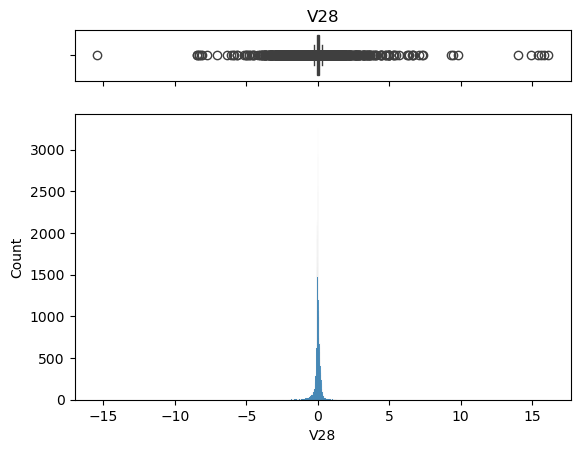

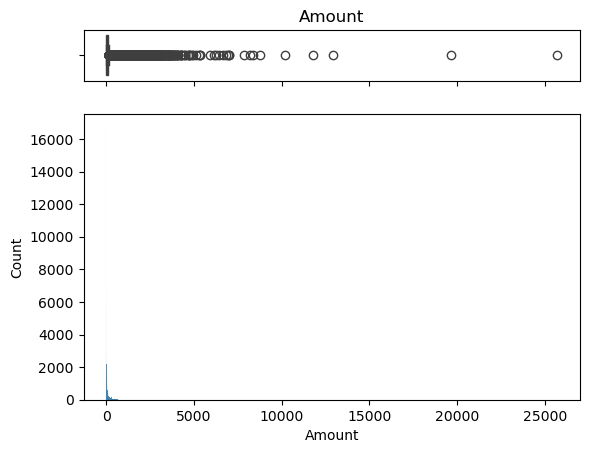

In [23]:
# combination between boxplot & histogram
boxHistplot_(conti, X_train)

### Findings:
1. Based on the below score, all of the continous are highly correlated with the target

In [24]:
scores = FS_LR(conti, y_train, X_train, 0)

The score between Time with Class is 0.99827
The score between V1 with Class is 0.99817
The score between V2 with Class is 0.99829
The score between V3 with Class is 0.99834
The score between V4 with Class is 0.99822
The score between V5 with Class is 0.9982
The score between V6 with Class is 0.99819
The score between V7 with Class is 0.99831
The score between V8 with Class is 0.99828
The score between V9 with Class is 0.99851
The score between V10 with Class is 0.99857
The score between V11 with Class is 0.99871
The score between V12 with Class is 0.99878
The score between V13 with Class is 0.99827
The score between V14 with Class is 0.99879
The score between V15 with Class is 0.99827
The score between V16 with Class is 0.99874
The score between V17 with Class is 0.99874
The score between V18 with Class is 0.99849
The score between V19 with Class is 0.99827
The score between V20 with Class is 0.99827
The score between V21 with Class is 0.99828
The score between V22 with Class is 0.998

### Approach 1: Under Sampling
1. After initial sampling, a function "UnderSampling" was created to fasten the under sampling process in the future

In [25]:
# creating copy
X_train_original = X_train
y_train_original = y_train

In [26]:
# Creating a new sample
df_sample = X_train.merge(y_train.to_frame(), left_index=True, right_index=True)

# Shuffle the data
df_sample = df_sample.sample(frac=1, random_state=0)

# check the amount of fraud case
fraud_df = df_sample.loc[df_sample['Class'] == 1]
fraud_df.shape

(148, 31)

In [27]:
# undersampling the non-fraud case
non_fraud_df = df_sample.loc[df_sample['Class'] == 0][:148]
non_fraud_df.shape

(148, 31)

In [28]:
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
under_sample_df = normal_distributed_df.sample(frac=1, 
                                               random_state=0).reset_index(drop=True)

In [29]:
under_sample_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,131398.0,2.056185,0.015937,-2.676678,0.251298,0.884379,-1.379643,1.001820,-0.524310,0.349833,...,0.315416,0.969566,-0.228471,0.711173,0.861986,-0.223941,-0.069258,-0.070291,47.00,0
1,161391.0,-0.250069,-1.281726,0.976685,-2.804654,-0.927324,-0.507120,0.226483,-0.252855,-1.884751,...,0.094512,0.539818,0.372708,0.026875,-0.879038,-0.459527,0.002533,0.001464,158.00,0
2,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
3,82883.0,1.277672,-0.604635,0.289354,-0.528809,-1.113411,-1.091099,-0.275495,-0.270319,-0.908314,...,-0.553466,-1.283112,0.136888,0.380451,0.035892,0.810335,-0.072272,0.021002,68.98,0
4,70272.0,-0.794085,1.513360,0.881211,-0.145053,0.264614,-0.527026,0.452034,-0.850712,-0.201284,...,0.438631,-1.015550,0.027651,-0.202427,0.004244,0.114186,0.395248,0.164008,5.25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,32344.0,1.542023,-1.088234,0.224453,-1.701579,-0.863803,0.500555,-1.264373,0.012532,-1.700096,...,-0.106075,0.199444,-0.165140,-1.287868,0.495925,0.007745,0.073695,0.013708,19.00,0
292,55681.0,0.999544,0.192232,0.767350,2.551323,-0.177000,0.355753,-0.032215,0.125272,-0.585437,...,-0.213120,-0.678455,-0.032918,-0.001514,0.377186,-0.186072,-0.005872,0.026168,74.54,0
293,62330.0,1.140865,1.221317,-1.452955,2.067575,0.854742,-0.981223,0.325714,-0.037721,0.113219,...,-0.377597,-0.793460,-0.132333,-0.331586,0.664878,-0.309312,0.099942,0.122988,1.00,1
294,21419.0,-17.467710,10.114816,-24.202142,11.805469,-10.198046,-2.579938,-17.656788,2.256902,-6.242149,...,-2.328024,0.940830,1.296817,-1.055104,0.111792,0.679695,2.093541,-1.425491,1.00,1


### Data Visualization after Under Sample

In [30]:
under_sample_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,131398.0,2.056185,0.015937,-2.676678,0.251298,0.884379,-1.379643,1.001820,-0.524310,0.349833,...,0.315416,0.969566,-0.228471,0.711173,0.861986,-0.223941,-0.069258,-0.070291,47.00,0
1,161391.0,-0.250069,-1.281726,0.976685,-2.804654,-0.927324,-0.507120,0.226483,-0.252855,-1.884751,...,0.094512,0.539818,0.372708,0.026875,-0.879038,-0.459527,0.002533,0.001464,158.00,0
2,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
3,82883.0,1.277672,-0.604635,0.289354,-0.528809,-1.113411,-1.091099,-0.275495,-0.270319,-0.908314,...,-0.553466,-1.283112,0.136888,0.380451,0.035892,0.810335,-0.072272,0.021002,68.98,0
4,70272.0,-0.794085,1.513360,0.881211,-0.145053,0.264614,-0.527026,0.452034,-0.850712,-0.201284,...,0.438631,-1.015550,0.027651,-0.202427,0.004244,0.114186,0.395248,0.164008,5.25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,32344.0,1.542023,-1.088234,0.224453,-1.701579,-0.863803,0.500555,-1.264373,0.012532,-1.700096,...,-0.106075,0.199444,-0.165140,-1.287868,0.495925,0.007745,0.073695,0.013708,19.00,0
292,55681.0,0.999544,0.192232,0.767350,2.551323,-0.177000,0.355753,-0.032215,0.125272,-0.585437,...,-0.213120,-0.678455,-0.032918,-0.001514,0.377186,-0.186072,-0.005872,0.026168,74.54,0
293,62330.0,1.140865,1.221317,-1.452955,2.067575,0.854742,-0.981223,0.325714,-0.037721,0.113219,...,-0.377597,-0.793460,-0.132333,-0.331586,0.664878,-0.309312,0.099942,0.122988,1.00,1
294,21419.0,-17.467710,10.114816,-24.202142,11.805469,-10.198046,-2.579938,-17.656788,2.256902,-6.242149,...,-2.328024,0.940830,1.296817,-1.055104,0.111792,0.679695,2.093541,-1.425491,1.00,1


In [31]:
under_sample_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,...,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,88664.702703,-1.968371,1.578758,-3.109001,2.273187,-1.443603,-0.696560,-2.352608,0.240492,-1.275419,...,0.491391,0.014712,-0.024153,-0.065258,0.087818,0.067796,0.102383,0.036669,115.598514,0.500000
std,47668.910207,4.892208,3.196243,5.757960,3.166662,3.671549,1.596735,5.158087,4.204286,2.174808,...,2.594530,1.113141,0.762897,0.556286,0.573173,0.514485,0.847699,0.412526,244.210921,0.500847
min,406.000000,-28.524268,-7.159042,-29.468732,-3.534282,-20.786000,-5.140999,-33.239328,-37.353443,-10.842526,...,-12.615023,-8.887017,-3.091624,-1.632653,-1.958433,-1.250527,-4.626127,-1.429517,0.000000,0.000000
25%,47235.000000,-2.282798,-0.183975,-4.990681,0.042676,-1.607291,-1.479283,-2.621531,-0.241632,-2.247944,...,-0.152193,-0.521726,-0.295750,-0.406434,-0.237326,-0.261441,-0.062029,-0.059286,1.000000,0.000000
50%,78527.000000,-0.620516,0.962931,-1.141855,1.313259,-0.512761,-0.657629,-0.542208,0.050721,-0.713263,...,0.178799,0.042742,-0.072389,-0.005878,0.098790,0.005046,0.037552,0.031082,20.975000,0.500000
75%,135375.750000,1.095015,2.506484,0.435925,4.047752,0.401516,0.067832,0.328788,0.724548,0.191313,...,0.641307,0.621009,0.169142,0.383182,0.389222,0.377434,0.389815,0.195226,111.857500,1.000000
max,170874.000000,2.214303,16.697832,3.534419,11.927512,5.601468,5.760059,3.790880,18.748872,3.353525,...,27.202839,5.774087,5.303607,1.100512,2.051687,2.653261,2.262942,1.773326,2125.870000,1.000000


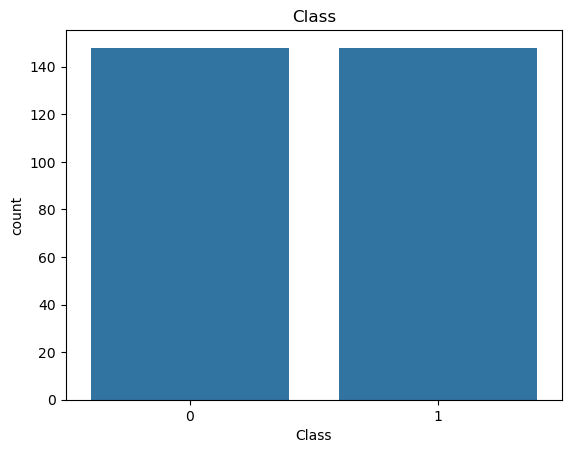

In [32]:
countplot_(['Class'], under_sample_df)

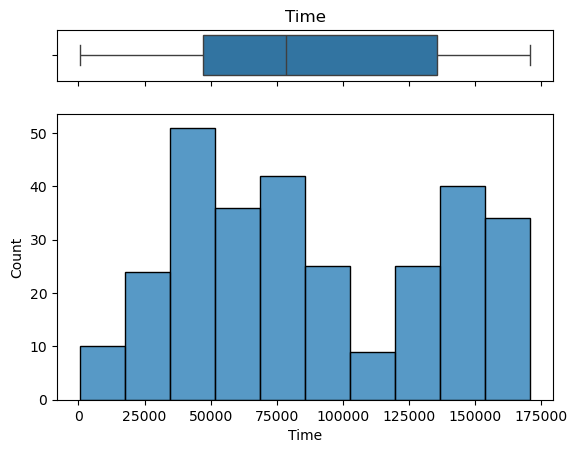

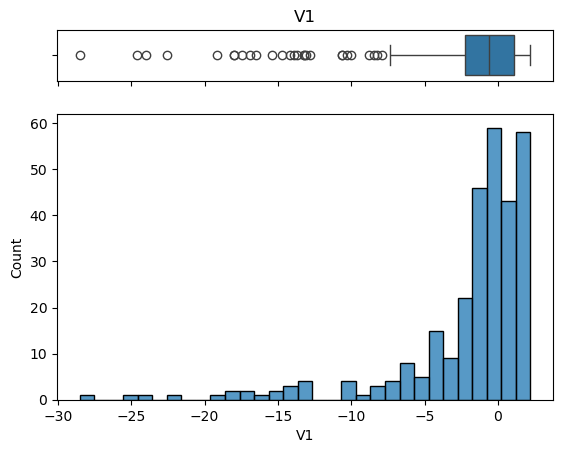

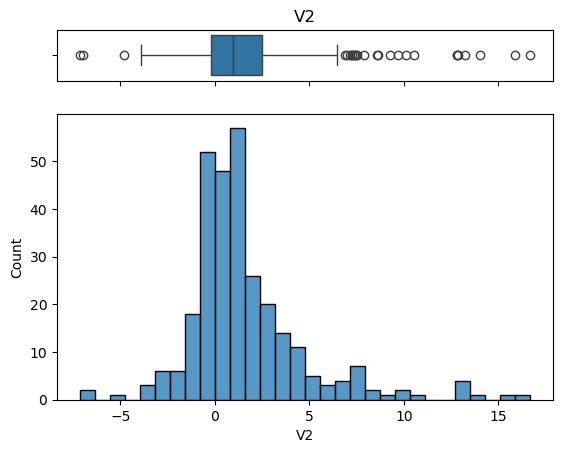

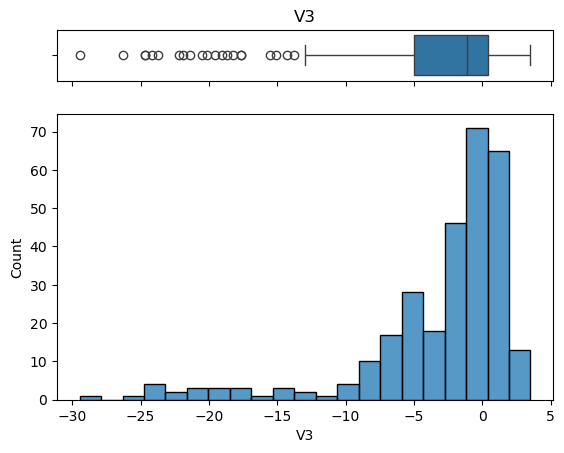

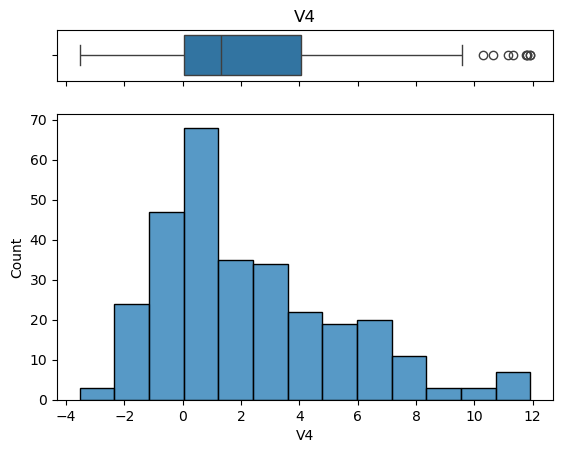

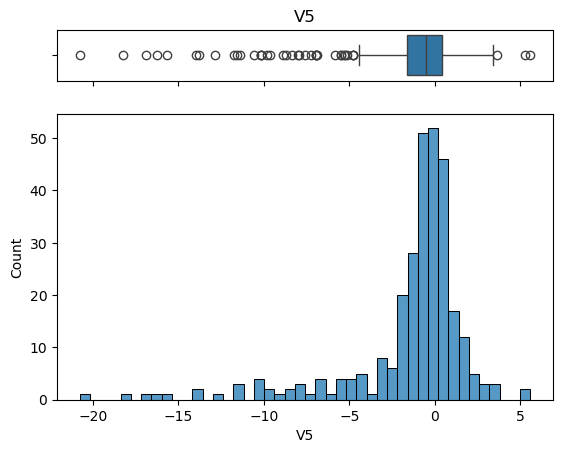

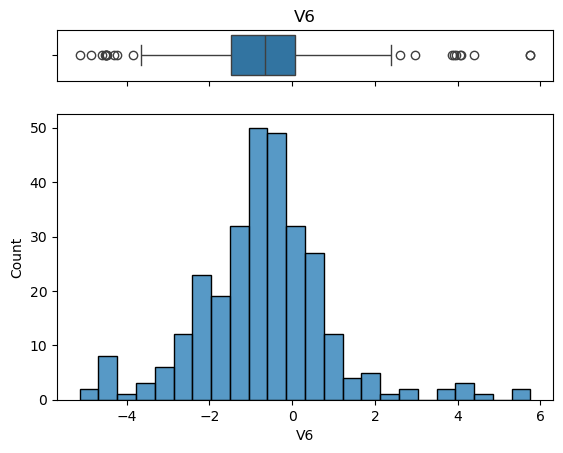

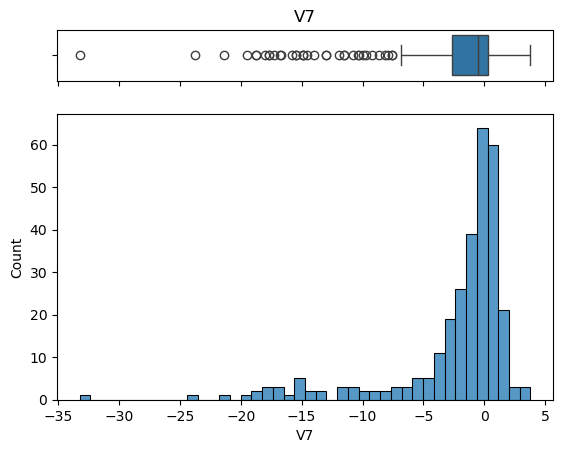

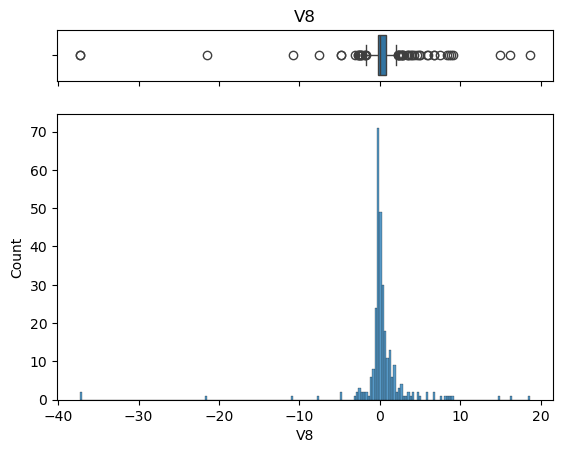

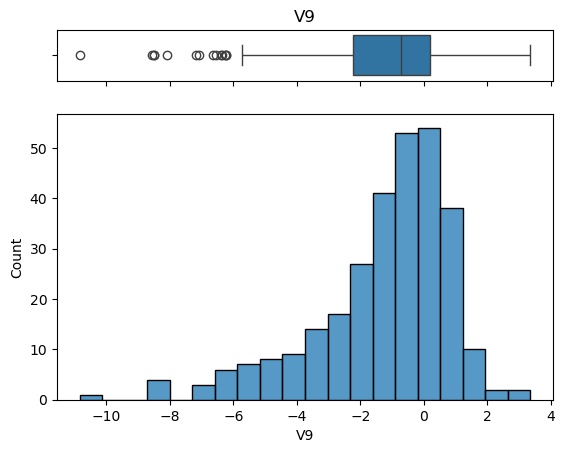

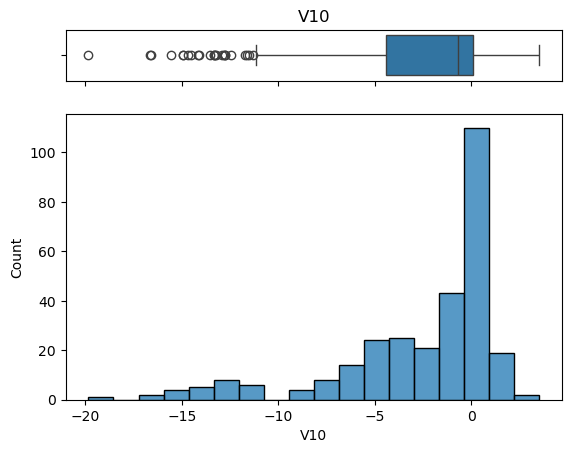

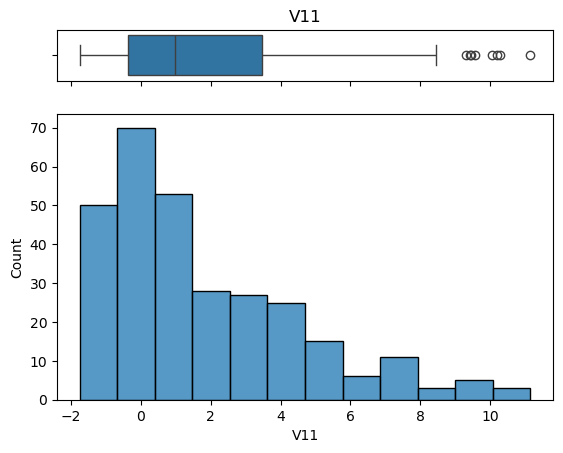

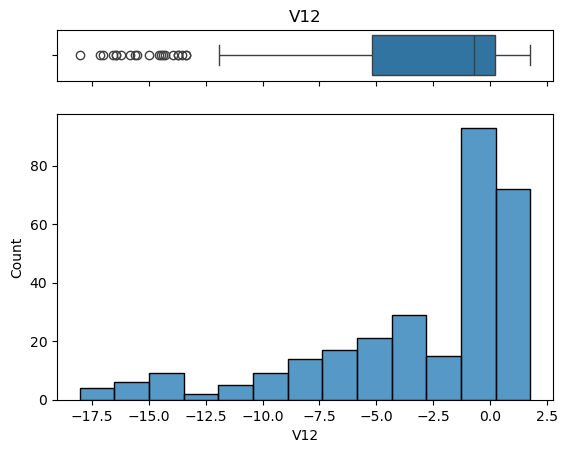

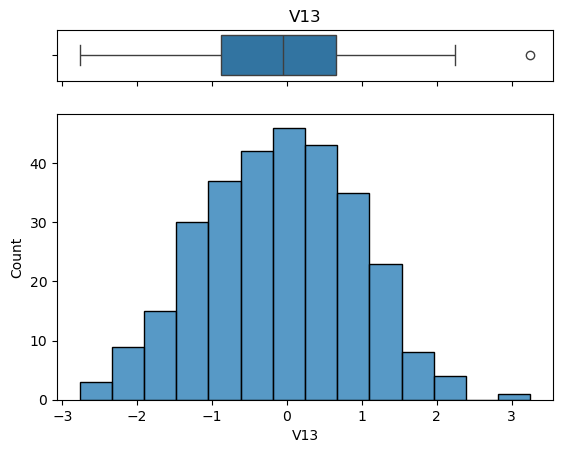

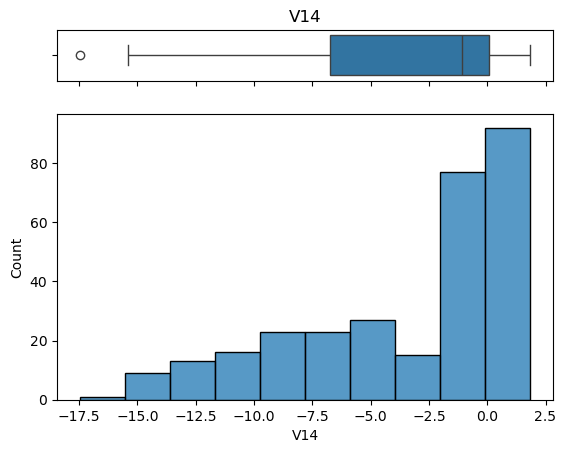

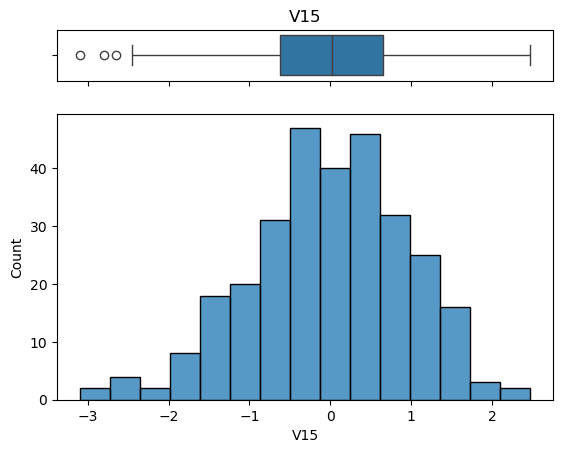

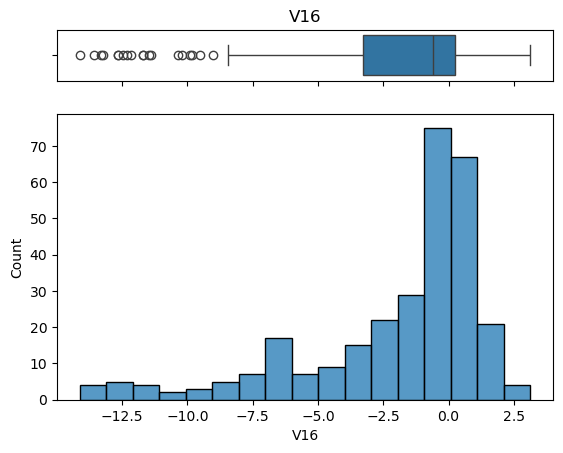

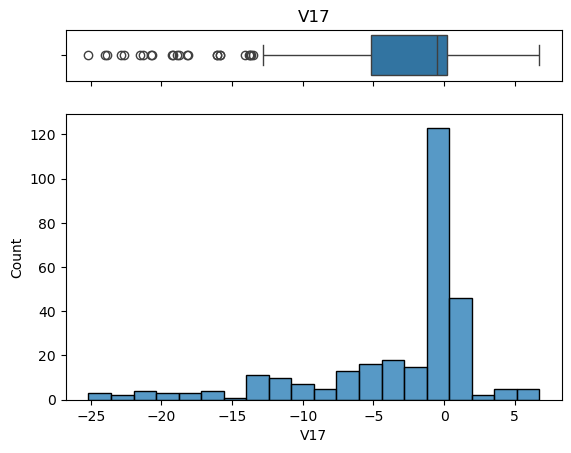

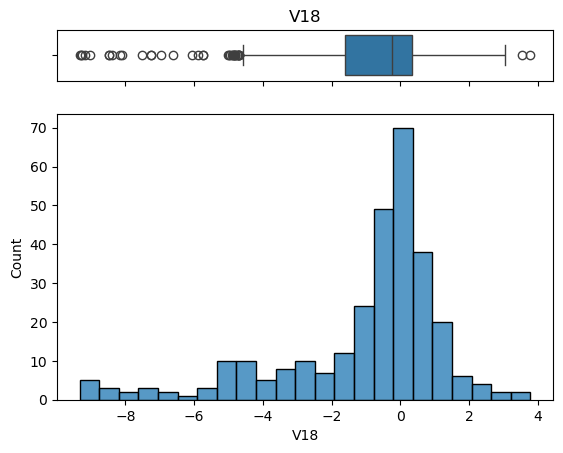

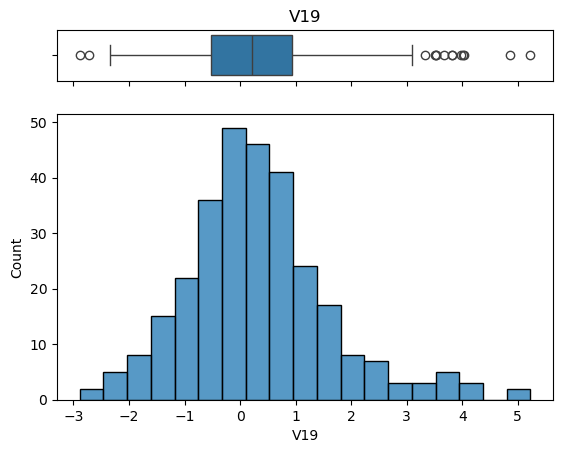

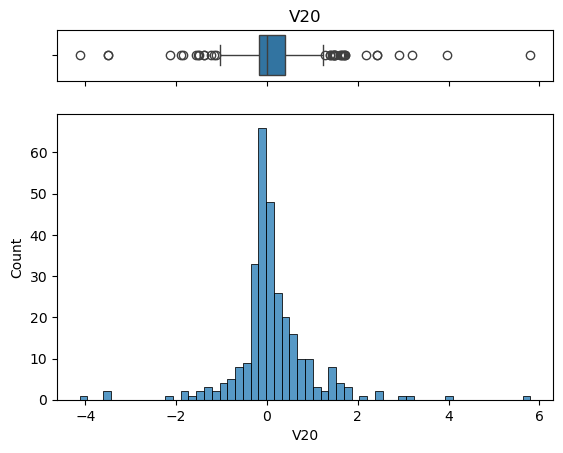

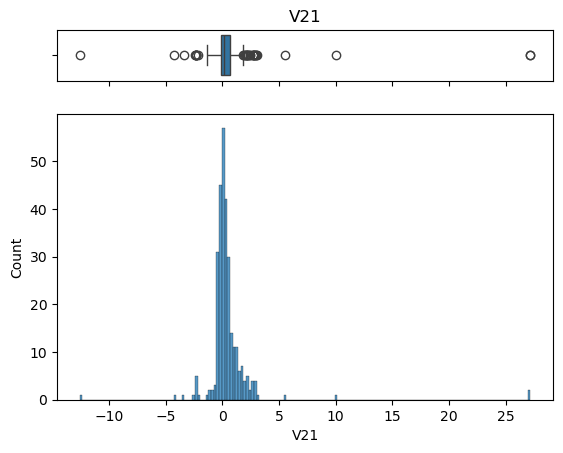

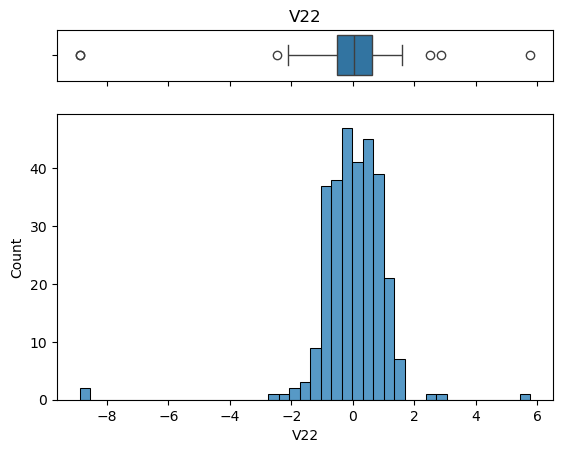

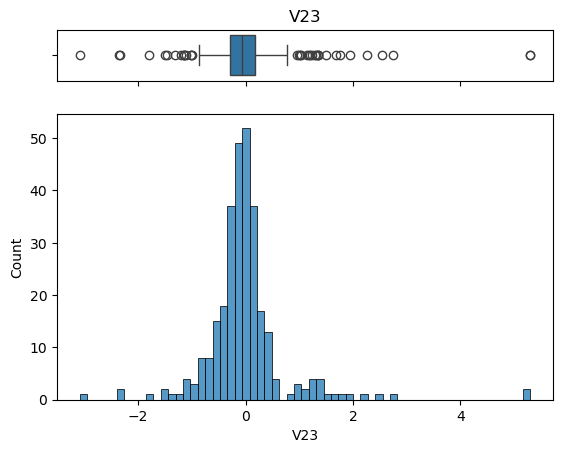

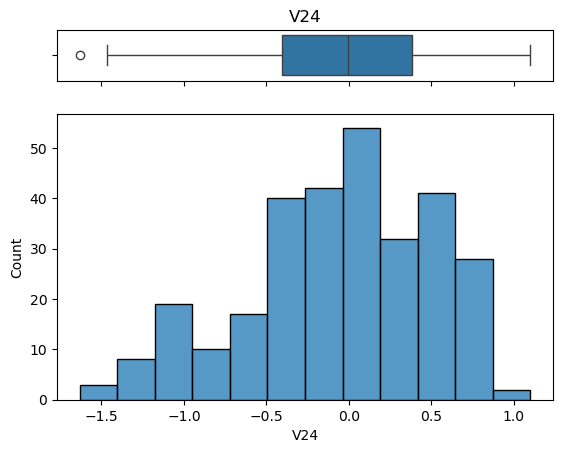

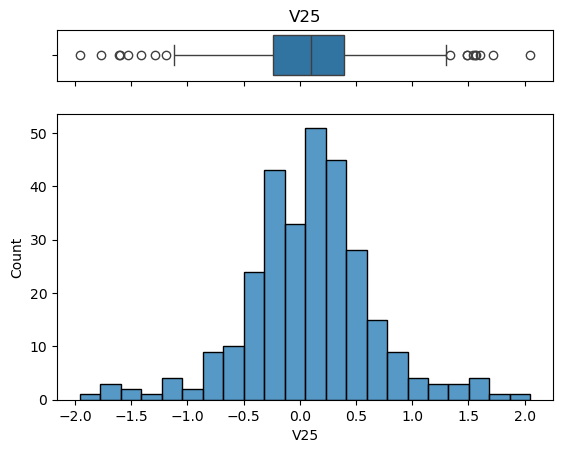

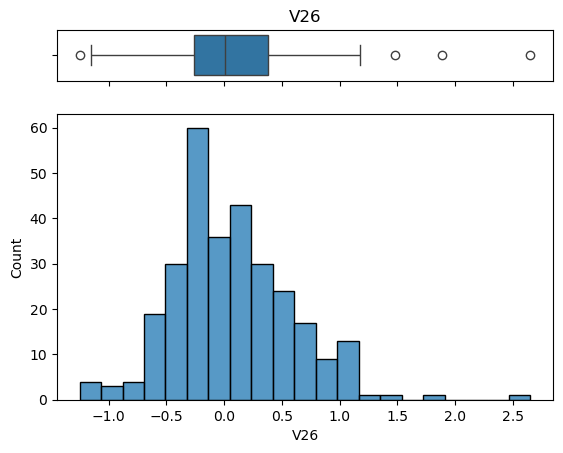

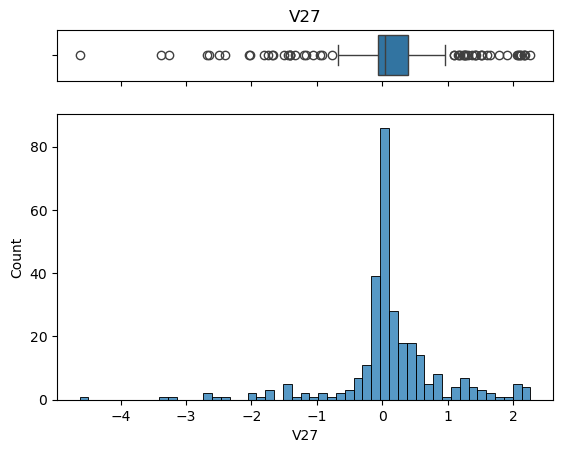

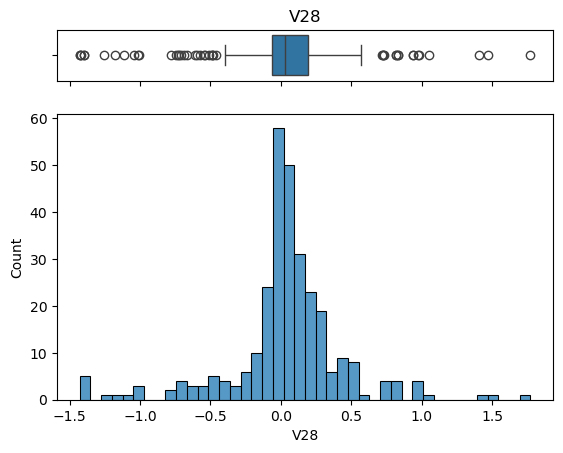

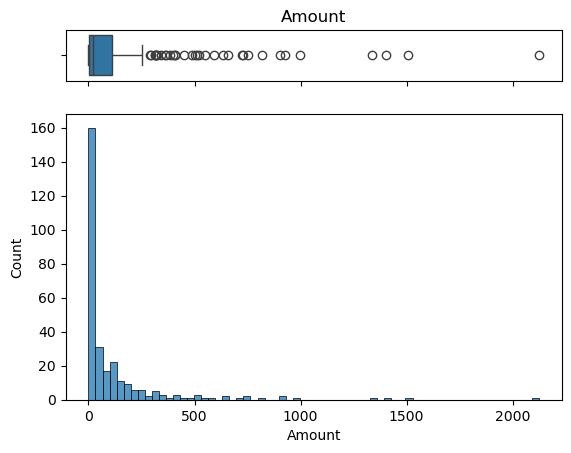

In [33]:
# lets inspect the data back
boxHistplot_(conti, under_sample_df)

In [34]:
y_train = under_sample_df['Class']
y_train

0      0
1      0
2      1
3      0
4      0
      ..
291    0
292    0
293    1
294    1
295    0
Name: Class, Length: 296, dtype: int64

In [35]:
X_train = under_sample_df.drop(columns=['Class'])
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,131398.0,2.056185,0.015937,-2.676678,0.251298,0.884379,-1.379643,1.001820,-0.524310,0.349833,...,-0.247371,0.315416,0.969566,-0.228471,0.711173,0.861986,-0.223941,-0.069258,-0.070291,47.00
1,161391.0,-0.250069,-1.281726,0.976685,-2.804654,-0.927324,-0.507120,0.226483,-0.252855,-1.884751,...,-0.023874,0.094512,0.539818,0.372708,0.026875,-0.879038,-0.459527,0.002533,0.001464,158.00
2,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00
3,82883.0,1.277672,-0.604635,0.289354,-0.528809,-1.113411,-1.091099,-0.275495,-0.270319,-0.908314,...,-0.355704,-0.553466,-1.283112,0.136888,0.380451,0.035892,0.810335,-0.072272,0.021002,68.98
4,70272.0,-0.794085,1.513360,0.881211,-0.145053,0.264614,-0.527026,0.452034,-0.850712,-0.201284,...,0.129022,0.438631,-1.015550,0.027651,-0.202427,0.004244,0.114186,0.395248,0.164008,5.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,32344.0,1.542023,-1.088234,0.224453,-1.701579,-0.863803,0.500555,-1.264373,0.012532,-1.700096,...,-0.209094,-0.106075,0.199444,-0.165140,-1.287868,0.495925,0.007745,0.073695,0.013708,19.00
292,55681.0,0.999544,0.192232,0.767350,2.551323,-0.177000,0.355753,-0.032215,0.125272,-0.585437,...,0.017938,-0.213120,-0.678455,-0.032918,-0.001514,0.377186,-0.186072,-0.005872,0.026168,74.54
293,62330.0,1.140865,1.221317,-1.452955,2.067575,0.854742,-0.981223,0.325714,-0.037721,0.113219,...,-0.067712,-0.377597,-0.793460,-0.132333,-0.331586,0.664878,-0.309312,0.099942,0.122988,1.00
294,21419.0,-17.467710,10.114816,-24.202142,11.805469,-10.198046,-2.579938,-17.656788,2.256902,-6.242149,...,1.001519,-2.328024,0.940830,1.296817,-1.055104,0.111792,0.679695,2.093541,-1.425491,1.00


### Feature Selection

### Findings:
1. After under sampling, the correlation between target and label has changes.
    - this is probably because of previous data sample are imbalanced, henceforth correlation were irrelevent

In [36]:
scores = FS_LR(conti, y_train, X_train, 0.8)

The score between Time with Class is 0.5
The score between V1 with Class is 0.73649
The score between V2 with Class is 0.8277
The score between V3 with Class is 0.84797
The score between V4 with Class is 0.83446
The score between V5 with Class is 0.6723
The score between V6 with Class is 0.70608
The score between V7 with Class is 0.83446
The score between V8 with Class is 0.68919
The score between V9 with Class is 0.79392
The score between V10 with Class is 0.89527
The score between V11 with Class is 0.88176
The score between V12 with Class is 0.87838
The score between V13 with Class is 0.59797
The score between V14 with Class is 0.93243
The score between V15 with Class is 0.58108
The score between V16 with Class is 0.83784
The score between V17 with Class is 0.86149
The score between V18 with Class is 0.72973
The score between V19 with Class is 0.61486
The score between V20 with Class is 0.63851
The score between V21 with Class is 0.74662
The score between V22 with Class is 0.54054
Th

### Preprocessing / Model Training

In [37]:
# lets using simple Logistic Classifier with scaler

scaler_dict = {
    'Min_Max_Scaler': MinMaxScaler(),
    'Std_Scaler': StandardScaler()
}

ml_dict = {
    'Logistic_Classifier': LogisticRegression()
}

pipelines_dict = {}

# create a combination between scaler and machine learning
for i in scaler_dict:
    for j in ml_dict:
        name_scaler = re.sub('[^A-Z]', '', i)
        name_ml = re.sub('[^A-Z]', '', j)
        pipelines_dict[name_scaler+'_'+name_ml] = Pipeline([(i,
                                                             scaler_dict[i]),
                                                            (j, ml_dict[j])
                                                            ])

In [38]:
pipelines_dict

{'MMS_LC': Pipeline(steps=[('Min_Max_Scaler', MinMaxScaler()),
                 ('Logistic_Classifier', LogisticRegression())]),
 'SS_LC': Pipeline(steps=[('Std_Scaler', StandardScaler()),
                 ('Logistic_Classifier', LogisticRegression())])}

In [39]:
# create an empty template for storing best models
models_score = {}
best_score = 0
best_model = []

# fit the models using pipelines
print('- -'*5, '\nScaler + Models scores\n', '- -'*5)
for pipe in pipelines_dict:
   pipelines_dict[pipe].fit(X_train, y_train)
   models_score[pipe] = pipelines_dict[pipe].score(X_test, y_test)
   print(f'The score for {pipe} : {models_score[pipe]}')
   if models_score[pipe] > best_score:
       best_score = models_score[pipe]
       best_model = pipelines_dict[pipe]

- -- -- -- -- - 
Scaler + Models scores
 - -- -- -- -- -
The score for MMS_LC : 0.9952649662679006
The score for SS_LC : 0.9725578712411908


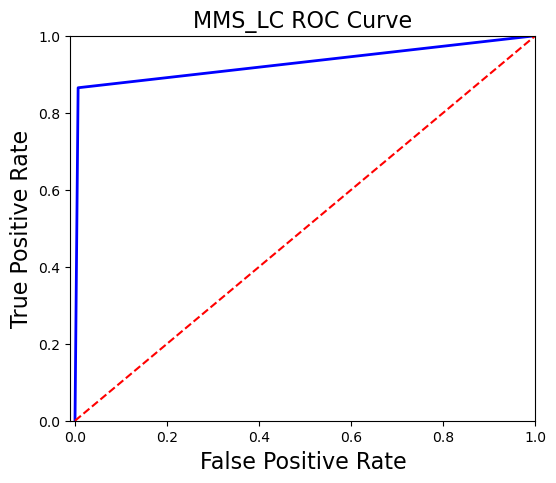

The ROC_AUC score for MMS_LC : 0.9805514974433893


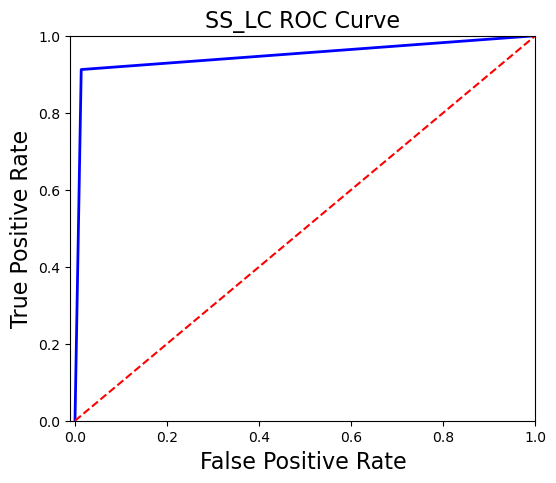

The ROC_AUC score for SS_LC : 0.9883126369612857


In [40]:
pipelines = modelBuild(scaler_dict, ml_dict)
best_model = modelFitBinary(pipelines, X_train, y_train, 1, 'roc_auc')

### Findings:
1. While the accuracy score are high, the X_test and y_test datasets are actually imbalanced, therefore the high accuracy are most likely to be contributed by the proportion of imbalanced
2. 

In [42]:
# check model accuracy
best_model.score(X_test, y_test)

0.9725578712411908

### Notes:
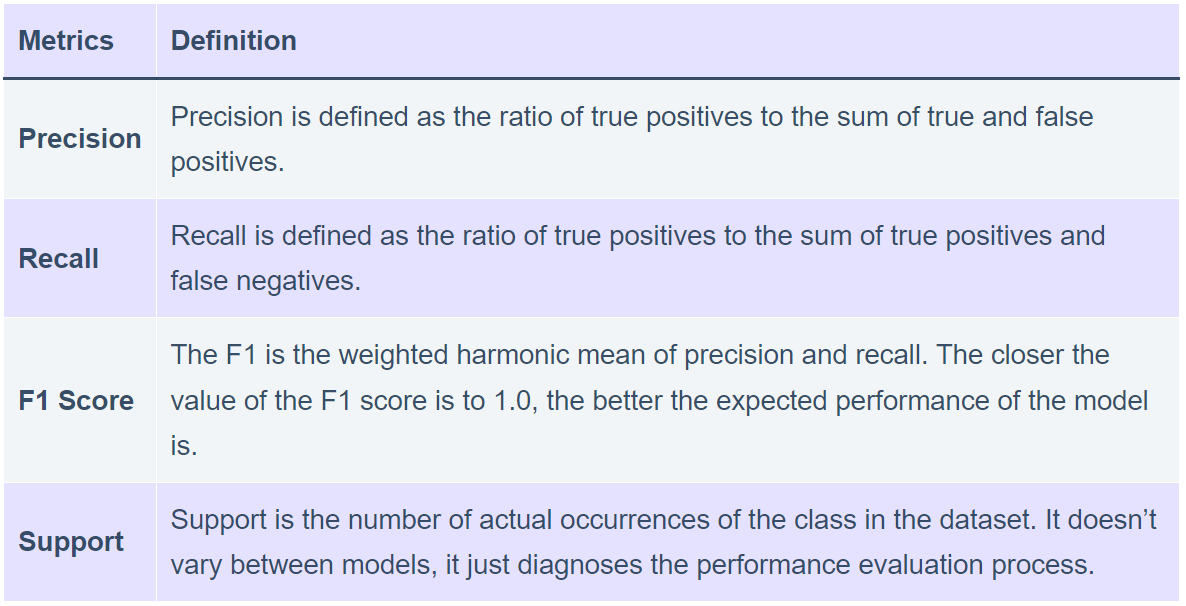

So based on the notes, according to our classification report, our model are actually not good in predicting the fraud

In [43]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99    199021
           1       0.05      0.89      0.10       344

    accuracy                           0.97    199365
   macro avg       0.53      0.93      0.54    199365
weighted avg       1.00      0.97      0.98    199365



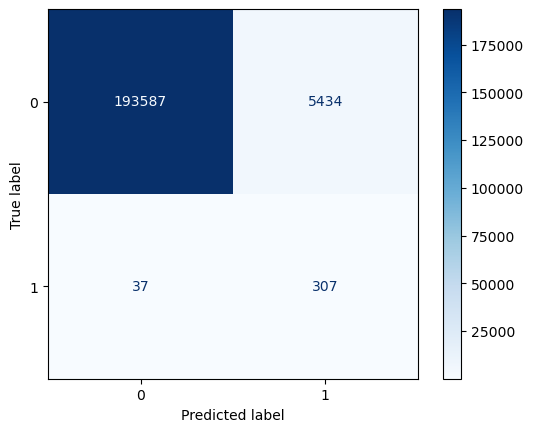

In [44]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues)
plt.show()

Classification Report 

               precision    recall  f1-score   support

           0       1.00      0.97      0.99    199021
           1       0.05      0.89      0.10       344

    accuracy                           0.97    199365
   macro avg       0.53      0.93      0.54    199365
weighted avg       1.00      0.97      0.98    199365



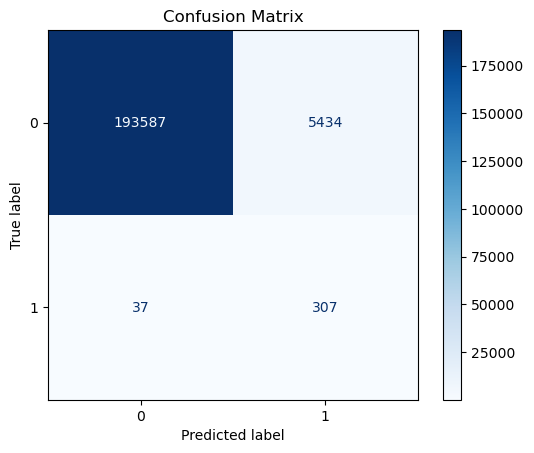

In [45]:
modelEvaBinary(best_model, X_test, y_test)

### Findings:
1. The performance of the model may due to the fact that the data split into 70% test and 30% training however the proportion was design to test our model building as well as to improve ML knowledge
2. On another note, based on my personal understanding, it is better to having higher recall score as it indicates: 
    - "**How many percentage of positive cases did the model managed to predict?**"
    
   compared to having high precision which:
    - "**How many percentage of model prediction is correct?**"
    

<div class="alert alert-block alert-info">
<b>Precision:</b> Accuracy of positive predictions. Where, Precision = TP/(TP + FP)
    <br>
<b>Recall:</b> Fraction of positives that were correctly identified. Where, Recall = TP/(TP+FN)
</div>

## Approach 2: Over Sampling

In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
# Oversampling from X_train original
X_train, y_train = SMOTE().fit_resample(X_train_original, y_train_original)

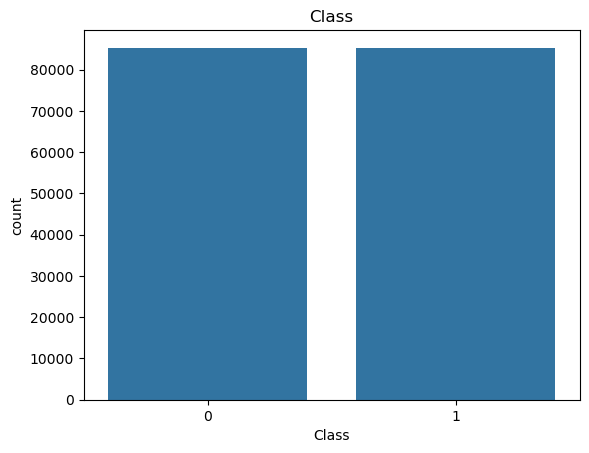

In [48]:
countplot_(['Class'], y_train)

In [54]:
# same feature selection score as in under sample
scores = FS_LR(conti, y_train, X_train, 0.8)

The score between Time with Class is 0.49999
The score between V1 with Class is 0.72999
The score between V2 with Class is 0.82269
The score between V3 with Class is 0.86322
The score between V4 with Class is 0.87937
The score between V5 with Class is 0.70092
The score between V6 with Class is 0.71176
The score between V7 with Class is 0.82615
The score between V8 with Class is 0.66732
The score between V9 with Class is 0.80043
The score between V10 with Class is 0.91319
The score between V11 with Class is 0.87892
The score between V12 with Class is 0.89771
The score between V13 with Class is 0.55505
The score between V14 with Class is 0.95093
The score between V15 with Class is 0.5566
The score between V16 with Class is 0.8441
The score between V17 with Class is 0.88175
The score between V18 with Class is 0.73643
The score between V19 with Class is 0.63462
The score between V20 with Class is 0.63822
The score between V21 with Class is 0.76853
The score between V22 with Class is 0.5031

c:\Users\isaac\anaconda3\envs\ds_project\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


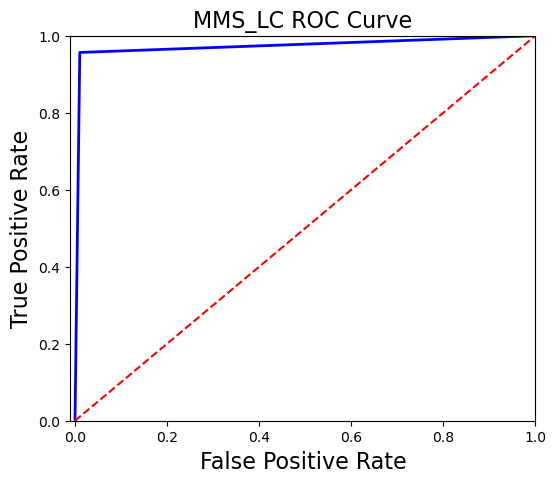

The ROC_AUC score for MMS_LC : 0.9971913319720508


c:\Users\isaac\anaconda3\envs\ds_project\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


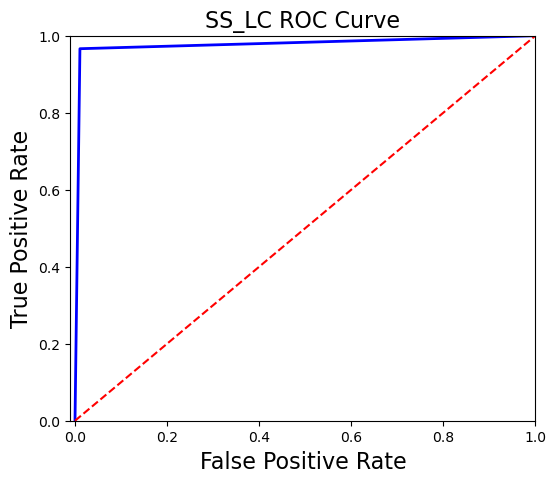

The ROC_AUC score for SS_LC : 0.9980196090129562


In [59]:
pipelines = modelBuild(scaler_dict, ml_dict)
best_model = modelFitBinary(pipelines, X_train, y_train, 1, 'roc_auc')

In [60]:
# check model accuracy
best_model.score(X_test, y_test)

0.9891956963358663

In [61]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    199021
           1       0.13      0.88      0.22       344

    accuracy                           0.99    199365
   macro avg       0.56      0.94      0.61    199365
weighted avg       1.00      0.99      0.99    199365



Classification Report 

               precision    recall  f1-score   support

           0       1.00      0.99      0.99    199021
           1       0.13      0.88      0.22       344

    accuracy                           0.99    199365
   macro avg       0.56      0.94      0.61    199365
weighted avg       1.00      0.99      0.99    199365



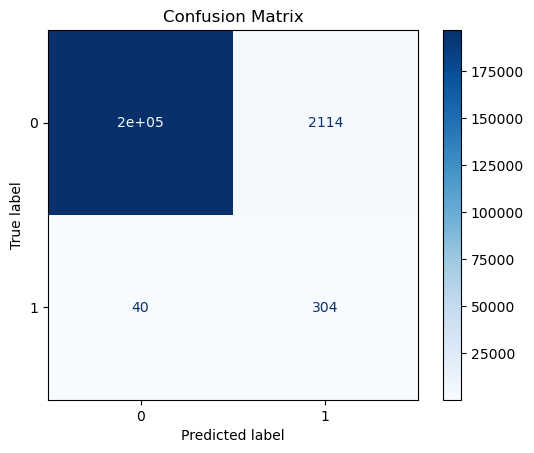

In [62]:
modelEvaBinary(best_model, X_test, y_test)

### Findings:
1. The performance wise are same as in **under sampling** case, however there are lots of thing can be done before finalized our model.
2. There are several method that havent been tested, however since repeatitive task are not my things, will construct a proper code to automate all the model training as well as logs all the model performances